# Extended figure 3

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

sys.path.append('./')
sys.path.append('../..') 
sys.path.append('../../main/Fig1') 
from consensus_variables import * 
from plot_f1 import *

In [3]:
# paths
data_dir = "../../data"
figures_dir = "plots/"

# files
sigprofiler_sign_file = os.path.join(data_dir, "sigprofiler/SBS96_De-Novo_Signatures.txt")
hdp_sign_file = os.path.join(deepcsa_run_dir, "signatures_hdp/samples_matrix.all.compared_output_dir/signatures.txt")

sigprofiler_contri_file = os.path.join(data_dir, "sigprofiler/SBS96_De-Novo_Activities_refit.txt")
hdp_contri_file = os.path.join(deepcsa_run_dir, "signatures_hdp/samples_matrix.all.compared_output_dir/signatureExposures_counts.txt")

total_mutcounts_file = os.path.join(additional_data_dir, "signatures/Mutation_stats_per_genome_per_sample.med.all.csv")



## Fig Ext 3a

In [4]:
sigprofiler_sign_df = pd.read_csv(sigprofiler_sign_file, sep = "\t", index_col = 0)
sigprofiler_sign_df

,SBS96A,SBS96B,SBS96C
MutationType,,,
A[C>A]A,0.005363,0.011960,0.052032
A[C>A]C,0.010950,0.009123,0.035504
A[C>A]G,0.004078,0.003188,0.004005
A[C>A]T,0.002578,0.005268,0.031588
A[C>G]A,0.009997,0.004341,0.015314
...,...,...,...
T[T>C]T,0.008482,0.019828,0.014412
T[T>G]A,0.007080,0.007522,0.002670
T[T>G]C,0.001921,0.005070,0.001096


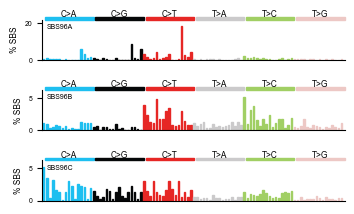

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(3.665, 2.259))
axs = axs.flatten()

# loop through profiles 
for i, signature in enumerate(sigprofiler_sign_df.columns):
    title = signature
    plot_signature(sigprofiler_sign_df[[signature]], axs[i], add_contexts=False, text = title,
                ttype = "Percentage")

plt.tight_layout()  
plt.savefig("plots/ExtendedFig3a_sigprofiler.pdf", 
            dpi = 300, bbox_inches = 'tight')
plt.show()

## Fig Ext 3b

In [19]:
hdp_sign_df = pd.read_csv(hdp_sign_file, sep = "\t")
hdp_sign_df

,N1,N2,N3,N4,N5
A[C>A]A,0.012616,0.061975,0.038105,0.003830,0.003831
A[C>G]A,0.008073,0.019032,0.003726,0.003721,0.010442
A[C>T]A,0.036192,0.028266,0.008301,0.011807,0.010404
A[C>A]C,0.012177,0.038965,0.036942,0.009406,0.010457
A[C>G]C,0.005412,0.007287,0.003989,0.009356,0.009709
...,...,...,...,...,...
T[T>C]G,0.006884,0.013291,0.006697,0.010574,0.001781
T[T>G]G,0.003010,0.003430,0.000873,0.005547,0.001293
T[T>A]T,0.005298,0.005204,0.006049,0.006815,0.003932
T[T>C]T,0.013842,0.012613,0.022955,0.020552,0.006691


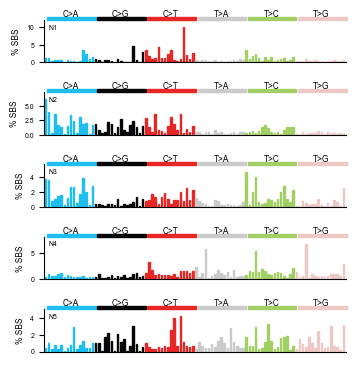

In [20]:
fig, axs = plt.subplots(5, 1, figsize=(3.665, 3.765))
axs = axs.flatten()

# loop through profiles 
for i, signature in enumerate(hdp_sign_df.columns):
    title = signature
    plot_signature(hdp_sign_df[[signature]], axs[i], add_contexts=False, text = title,
                ttype = "Percentage")

plt.tight_layout()  
plt.savefig("plots/ExtendedFig3b_hdp.pdf", 
            dpi = 300, bbox_inches = 'tight')
plt.show()

## Fig Ext 3c

In [22]:
sigprofiler2color = {"SBS96A": "#005f73",
                    "SBS96C": "#94d2bd",
                    "SBS96B": "#0a9396", 
                    }

In [23]:
# load total counts per context
total_mutcounts = pd.read_csv(total_mutcounts_file)
display(total_mutcounts)

# order by total mut count and keep sample IDs
samples_ordered = total_mutcounts.sort_values(by = "Total_mut_genome", ascending = False)["SAMPLE_ID"].values
samples_ordered

,SAMPLE_ID,Total_mut_genome,CtoA_genome,CtoT_genome,CtoG_genome,TtoA_genome,TtoC_genome,TtoG_genome
0,P19_0001_BDO_01,94,13.347848,29.535242,14.703994,4.874999,23.894711,7.643206
1,P19_0001_BTR_01,200,27.447907,75.546995,32.946428,10.095335,37.646620,16.316715
2,P19_0002_BDO_01,948,206.410005,305.631740,146.119123,52.193169,186.698500,50.947463
3,P19_0002_BTR_01,988,228.195224,318.762550,164.788304,55.173337,171.981621,49.098965
4,P19_0003_BDO_01,768,102.991277,262.349014,109.093386,75.863791,144.591674,73.110858
...,...,...,...,...,...,...,...,...
74,P19_0051_BTR_01,895,129.245401,324.269764,105.594469,85.468271,176.539214,73.882882
75,P19_0052_BDO_01,177,24.293240,62.093068,24.967912,8.934679,49.126249,7.584853
76,P19_0052_BTR_01,206,26.394390,64.971731,31.616165,20.010462,44.714597,18.292655
77,P19_0053_BDO_01,587,81.555074,190.191697,63.567016,71.280160,125.289268,55.116785


array(['P19_0023_BTR_01', 'P19_0023_BDO_01', 'P19_0008_BTR_01',
       'P19_0050_BTR_01', 'P19_0012_BTR_01', 'P19_0002_BTR_01',
       'P19_0002_BDO_01', 'P19_0042_BDO_01', 'P19_0051_BTR_01',
       'P19_0050_BDO_01', 'P19_0015_BTR_01', 'P19_0004_BDO_01',
       'P19_0029_BTR_01', 'P19_0035_BDO_01', 'P19_0009_BTR_01',
       'P19_0008_BDO_01', 'P19_0004_BTR_01', 'P19_0003_BDO_01',
       'P19_0012_BDO_01', 'P19_0028_BDO_01', 'P19_0026_BDO_01',
       'P19_0048_BTR_01', 'P19_0018_BTR_01', 'P19_0028_BTR_01',
       'P19_0026_BTR_01', 'P19_0015_BDO_01', 'P19_0038_BDO_01',
       'P19_0034_BDO_01', 'P19_0042_BTR_01', 'P19_0051_BDO_01',
       'P19_0039_BTR_01', 'P19_0014_BDO_01', 'P19_0046_BDO_01',
       'P19_0053_BDO_01', 'P19_0034_BTR_01', 'P19_0016_BTR_01',
       'P19_0011_BDO_01', 'P19_0029_BDO_01', 'P19_0025_BTR_01',
       'P19_0005_BDO_01', 'P19_0025_BDO_01', 'P19_0018_BDO_01',
       'P19_0009_BDO_01', 'P19_0005_BTR_01', 'P19_0019_BTR_01',
       'P19_0053_BTR_01', 'P19_0011_BTR_

In [24]:
# load signatures
sigprofiler_exposures = pd.read_csv(sigprofiler_contri_file, sep = "\t", index_col = 0)
sigprofiler_exposures = sigprofiler_exposures.reindex(samples_ordered).dropna()
sigprofiler_exposures

,SBS96A,SBS96B,SBS96C
Samples,,,
P19_0023_BTR_01,248,485,506
P19_0023_BDO_01,288,455,456
P19_0008_BTR_01,114,289,797
P19_0050_BTR_01,704,293,69
P19_0012_BTR_01,487,0,538
...,...,...,...
P19_0033_BTR_01,86,33,21
P19_0013_BTR_01,0,53,64
P19_0027_BTR_01,5,68,43


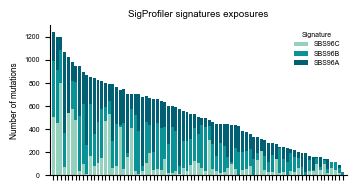

In [26]:
fig, ax = plt.subplots(1, 1, figsize = (3.665,  2))

x = np.arange(len(sigprofiler_exposures.index))
bottom = np.zeros(len(sigprofiler_exposures)) 

for signature in reversed(sigprofiler_exposures.columns):
    ax.bar(x, sigprofiler_exposures[signature], bottom=bottom, label=signature,
           color=sigprofiler2color[signature])
    bottom += sigprofiler_exposures[signature]

ax.set_xticks(x)
ax.set_xlim(-1, len(x))
ax.set_xticklabels([])
ax.set_ylabel('Number of mutations', fontsize = plots_general_config["xylabel_fontsize"])
ax.set_title('SigProfiler signatures exposures', fontsize = plots_general_config["title_fontsize"])
ax.legend(title='Signature', fontsize=plots_general_config["legend_fontsize"],
          title_fontsize=plots_general_config["legend_fontsize"], frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig("plots/ExtendedFig3c_sigprofiler.pdf", 
            dpi = 300, bbox_inches = 'tight')
plt.show()

## Fig Ext 3d

In [27]:
hdp2color = {"N1": "#005f73",
            "N2": "#94d2bd",
            "N3": "#0a9396", 
            "N4": "#e9d8a6",
            "N5": "#ee9b00"}

In [28]:
# load signatures
hdp_exposures = pd.read_csv(hdp_contri_file, sep = "\t")
hdp_exposures = hdp_exposures.reindex(samples_ordered).dropna()
hdp_exposures

,N1,N2,N3,N4,N5
P19_0023_BTR_01,884.0,349.0,3.0,1.0,1.0
P19_0023_BDO_01,868.0,328.0,1.0,1.0,1.0
P19_0008_BTR_01,601.0,580.0,16.0,2.0,1.0
P19_0050_BTR_01,1061.0,2.0,2.0,0.0,0.0
P19_0012_BTR_01,611.0,407.0,4.0,0.0,2.0
...,...,...,...,...,...
P19_0013_BDO_01,21.0,25.0,91.0,1.0,1.0
P19_0033_BTR_01,115.0,10.0,11.0,1.0,3.0
P19_0013_BTR_01,30.0,7.0,76.0,3.0,1.0
P19_0027_BTR_01,55.0,8.0,41.0,11.0,1.0


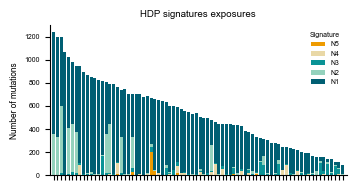

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (3.665,  2))

x = np.arange(len(hdp_exposures.index))
bottom = np.zeros(len(hdp_exposures)) 

for signature in reversed(hdp_exposures.columns):
    ax.bar(x, hdp_exposures[signature], bottom=bottom, label=signature,
           color=hdp2color[signature])
    bottom += hdp_exposures[signature]

ax.set_xticks(x)
ax.set_xlim(-1, len(x))
ax.set_xticklabels([])
ax.set_ylabel('Number of mutations', fontsize = plots_general_config["xylabel_fontsize"])
ax.set_title('HDP signatures exposures', fontsize = plots_general_config["title_fontsize"])
ax.legend(title='Signature', fontsize=plots_general_config["legend_fontsize"],
          title_fontsize=plots_general_config["legend_fontsize"], frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig("plots/ExtendedFig3d_hdp.pdf", 
            dpi = 300, bbox_inches = 'tight')
plt.show()